In [51]:
import numpy as np

data = {'x': [], 'y':[], 'class':[], 'color': []}


mean_std_dev = [([2,3], np.diag([0.8, 2.5])) ,
([5,6], np.diag([1.2, 1.9])),
([8,1], np.diag([0.9, 0.9])),
([15,4], np.diag([0.5, 2.0]))]
mean = [2, 3]
cov = np.diag([0.8, 2.5])
for i in range(0, 4):

    mean = mean_std_dev[i][0]
    cov = mean_std_dev[i][1]

    x, y = np.random.multivariate_normal(mean, cov, 100).T
    classe = []
    for c in range(0, len(x)):
        data['x'].append(x[c])
        data['y'].append(y[c])
        data['class'].append(f"class_{i}")
        if i == 0:
            data['color'].append((1.0, 0.0, 0.0))
        if i == 1:
            data['color'].append((1.0,0.0,1.0,))
        if i == 2:
            data['color'].append((1.0, 1.0, 0.0))
        if i == 3:
            data['color'].append((1.0, 0.5, 0.5))


In [52]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,x,y,class,color
0,0.710757,3.666313,class_0,"(1.0, 0.0, 0.0)"
1,2.810294,1.458766,class_0,"(1.0, 0.0, 0.0)"
2,0.854907,4.358507,class_0,"(1.0, 0.0, 0.0)"
3,0.569114,2.943896,class_0,"(1.0, 0.0, 0.0)"
4,1.520029,2.537345,class_0,"(1.0, 0.0, 0.0)"


c:\Users\eduse\anaconda3\conda\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='x', ylabel='y'>

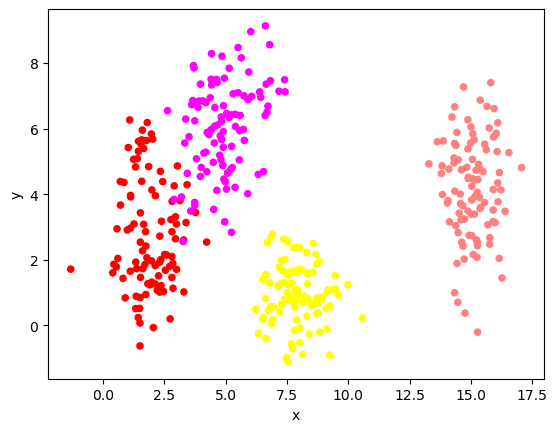

In [53]:
df.plot.scatter(x='x', y='y',c='color', colormap='viridis')

a.Percebe-se que as duas classes mais a direita estão bme disntintas. Enquanto, que as duas a mais esquerda, vermelho e roxo, apresentam um overlap entre elas.

b.Observando o plot precisa de duas linear boundays, para poder distinguir, uma vez que com uma apenas daria para separar entre duas metade  esquerdo e direito, wue teria duas classes cada.


## Exercicio 2

In [1]:
import numpy as np
import pandas as pd

# semente para reprodutibilidade
rng = np.random.default_rng(42)

# dicionário no mesmo espírito do seu exemplo
data = {
    'x1': [], 'x2': [], 'x3': [], 'x4': [], 'x5': [],
    'class': [], 'color': []
}

# parâmetros (mean, cov, rótulo, cor)
params = [
    (
        np.array([0.0, 0.0, 0.0, 0.0, 0.0]),
        np.array([
            [1.0, 0.8, 0.1, 0.0, 0.0],
            [0.8, 1.0, 0.3, 0.0, 0.0],
            [0.1, 0.3, 1.0, 0.5, 0.0],
            [0.0, 0.0, 0.5, 1.0, 0.2],
            [0.0, 0.0, 0.0, 0.2, 1.0],
        ]),
        "class_A",
        (1.0, 0.0, 0.0),  # vermelho
    ),
    (
        np.array([1.5, 1.5, 1.5, 1.5, 1.5]),
        np.array([
            [1.5, -0.7, 0.2, 0.0, 0.0],
            [-0.7, 1.5, 0.4, 0.0, 0.0],
            [0.2, 0.4, 1.5, 0.6, 0.0],
            [0.0, 0.0, 0.6, 1.5, 0.3],
            [0.0, 0.0, 0.0, 0.3, 1.5],
        ]),
        "class_B",
        (0.0, 0.0, 1.0),  # azul
    ),
]

n_per_class = 500

for mean, cov, label, color in params:
    # amostras 5-D (N x 5) — não dá para desempacotar em x,y
    samples = rng.multivariate_normal(mean, cov, size=n_per_class)
    for s in samples:
        data['x1'].append(s[0])
        data['x2'].append(s[1])
        data['x3'].append(s[2])
        data['x4'].append(s[3])
        data['x5'].append(s[4])
        data['class'].append(label)
        data['color'].append(color)

# opcional: DataFrame e salvar CSV
df = pd.DataFrame(data)
print(df.head())
df.to_csv("dataset_classes_A_B_5d.csv", index=False)


         x1        x2        x3        x4        x5    class            color
0 -1.066846 -0.174621  0.135507  1.366949 -0.522722  class_A  (1.0, 0.0, 0.0)
1  0.969989  1.468796  0.436883  0.337675  0.319034  class_A  (1.0, 0.0, 0.0)
2 -0.066573 -0.791497 -1.356675 -0.434748 -0.586902  class_A  (1.0, 0.0, 0.0)
3  1.181304  0.864509 -0.473844  0.322390  0.648798  class_A  (1.0, 0.0, 0.0)
4 -0.430099  0.036130  0.982523  0.638111 -0.838178  class_A  (1.0, 0.0, 0.0)


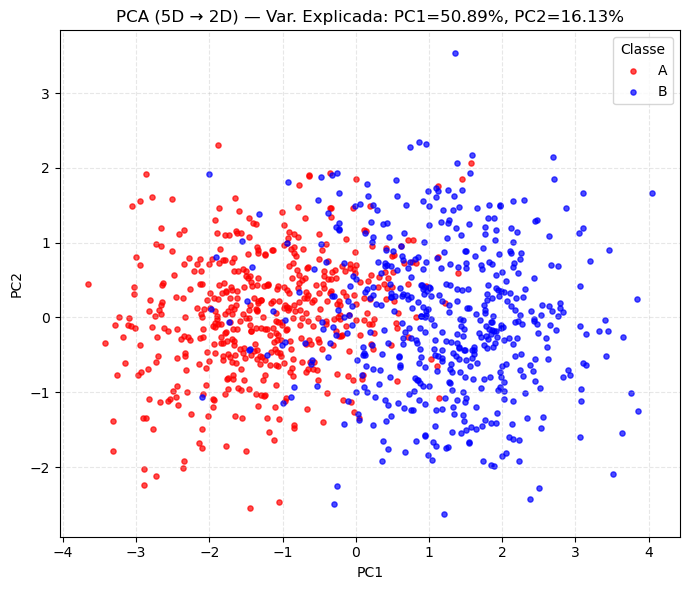

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


try:
    df
except NameError:
    df = pd.read_csv("dataset_classes_A_B_5d.csv")


X = df[['x1', 'x2', 'x3', 'x4', 'x5']].to_numpy()
y = df['class'].to_numpy()


X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X_std)


plot_df = pd.DataFrame({
    'PC1': X_2d[:, 0],
    'PC2': X_2d[:, 1],
    'class': y
})


class_to_color = {
    'class_A': (1.0, 0.0, 0.0),  
    'class_B': (0.0, 0.0, 1.0)   
}

plt.figure(figsize=(7, 6))
for label, color in class_to_color.items():
    subset = plot_df[plot_df['class'] == label]
    plt.scatter(
        subset['PC1'], subset['PC2'],
        s=14, alpha=0.7, label=label.replace('class_', '').upper(),
        c=[color]
    )

# informações do gráfico
exp_var = pca.explained_variance_ratio_
plt.title(f"PCA (5D → 2D) — Var. Explicada: PC1={exp_var[0]:.2%}, PC2={exp_var[1]:.2%}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Classe")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
